In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0'

In [4]:
conda install -c conda-forge matplotlib

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



In [5]:
import matplotlib.pyplot as plt

In [6]:
import pandas as pd

In [7]:
from pandas.io.parsers import read_csv

In [17]:
data = read_csv("D:\cdgoung_data.csv", sep=",")

In [18]:
xy = np.array(data, dtype=np.float32)

In [19]:
data.head(3)

year  avgTemp  minTemp  maxTemp  rainFall  holiday  jan  feb  mar  apr  \
0  20090101     -5.8     -9.5     -2.5       0.0      1.2    1    0    0    0   
1  20090102     -2.8     -6.9      1.2       0.0      1.2    1    0    0    0   
2  20090103     -1.0     -5.6      4.0       0.0      1.2    1    0    0    0   

   may  jun  jul  aug  sep  oct  nov  dec  result  
0    0    0    0    0    0    0    0    0    2553  
1    0    0    0    0    0    0    0    0    2307  
2    0    0    0    0    0    0    0    0    2777

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = xy[:,1:-1]

In [22]:
y = xy[:, -1]

In [23]:
data.head(5)

year  avgTemp  minTemp  maxTemp  rainFall  holiday  jan  feb  mar  apr  \
0  20090101     -5.8     -9.5     -2.5       0.0      1.2    1    0    0    0   
1  20090102     -2.8     -6.9      1.2       0.0      1.2    1    0    0    0   
2  20090103     -1.0     -5.6      4.0       0.0      1.2    1    0    0    0   
3  20090104      0.4     -2.8      4.5       0.0      1.0    1    0    0    0   
4  20090105     -1.6     -3.4      1.2       0.0      0.0    1    0    0    0   

   may  jun  jul  aug  sep  oct  nov  dec  result  
0    0    0    0    0    0    0    0    0    2553  
1    0    0    0    0    0    0    0    0    2307  
2    0    0    0    0    0    0    0    0    2777  
3    0    0    0    0    0    0    0    0    2295  
4    0    0    0    0    0    0    0    0       0

In [24]:
df_cor = data.corr()

In [25]:
df_cor.style.background_gradient(cmap="coolwarm").set_precision(3)

In [26]:
xy.shape

(4167, 19)

In [27]:
cor_target=abs(df_cor['result'])

In [28]:
relevant_features = cor_target[cor_target>0.04].index.values.tolist()

In [29]:
df_fin=data[relevant_features]

In [30]:
df_fin.head(3)

year  avgTemp  minTemp  maxTemp  rainFall  holiday  jan  feb  mar  apr  \
0  20090101     -5.8     -9.5     -2.5       0.0      1.2    1    0    0    0   
1  20090102     -2.8     -6.9      1.2       0.0      1.2    1    0    0    0   
2  20090103     -1.0     -5.6      4.0       0.0      1.2    1    0    0    0   

   may  jun  jul  aug  sep  oct  nov  dec  result  
0    0    0    0    0    0    0    0    0    2553  
1    0    0    0    0    0    0    0    0    2307  
2    0    0    0    0    0    0    0    0    2777

In [31]:
xy[0:3, :]

array([[ 2.0090100e+07, -5.8000002e+00, -9.5000000e+00, -2.5000000e+00,
         0.0000000e+00,  1.2000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  2.5530000e+03],
       [ 2.0090102e+07, -2.8000000e+00, -6.9000001e+00,  1.2000000e+00,
         0.0000000e+00,  1.2000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  2.3070000e+03],
       [ 2.0090104e+07, -1.0000000e+00, -5.5999999e+00,  4.0000000e+00,
         0.0000000e+00,  1.2000000e+00,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x = xy[:,1:-1]

In [34]:
y = xy[:,-1]

In [35]:
x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all,y_train_all, test_size=0.2, random_state=42)

In [37]:
y

array([2553., 2307., 2777., ..., 5912., 1399., 1382.], dtype=float32)

In [38]:
from sklearn.linear_model import LinearRegression as LR

In [39]:
df_fit = LR().fit(x_train, y_train)

In [40]:
y_pred = df_fit.predict(x_test)

In [41]:
import matplotlib.pyplot as plt

In [42]:
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

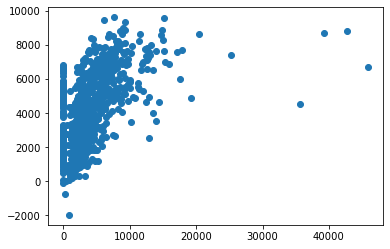

In [43]:
plt.scatter(y_test,y_pred)

In [44]:
plt.show()

In [45]:
a = np.array([[20,20,20,0,1.2,0,0,0,0,0,0,0,1,0,0,0,0]])

In [46]:
print(df_fit.predict(a))

[3314.49284668]
